In [1]:
import sys  
import os
sys.path.insert(0, os.path.join(os.path.abspath(os.getcwd()), ".."))

import json
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from random import randint
from utils import *

In [2]:
WIDTH = HEIGHT = 512
PROJECT_NAME = "goodbadchili"

In [3]:
PROJECT_DATASET_DIR = os.path.join(os.path.abspath(os.getcwd()), "..", "..", "datasets", PROJECT_NAME)
JSON_PATH = os.path.join(PROJECT_DATASET_DIR, "COCO", "annotations", "instances_train.json")
IMAGE_DIR = os.path.join(PROJECT_DATASET_DIR, "COCO", "train")
IMAGE_PATHS = glob.glob(os.path.join(IMAGE_DIR, "*.jpg"))

In [4]:
d = json.load(open(JSON_PATH))
id_to_annot = dict()
for a in d["annotations"]:
	id = a["image_id"]
	if id in id_to_annot:
		id_to_annot[id].append(a)
	else:
		id_to_annot[id] = [a]

In [5]:
img_id = max(x["id"] for x in d["images"]) + 1
annot_id = max(x["id"] for x in d["annotations"]) + 1
for img_path in tqdm(IMAGE_PATHS):
    current_id = int(img_path.split(os.sep)[-1].replace(".jpg", ""))
    annot = id_to_annot[current_id]
    img = cv2.imread(img_path)
    if randint(1, 100) <= 55:
        is_horizontal = (randint(1, 100) <= 55)
        img = flip_img(img, is_horizontal=is_horizontal)
        annot = [flip_point(Annotation.from_dict(a), current_id, a["id"], is_horizontal=(1 if is_horizontal else 0), w=WIDTH, h=HEIGHT).to_dict() for a in annot]
    for i in range(6):
        rt_angle = randint(-30, 30)
        rt_img = rotate_img(img, angle=rt_angle)
        cv2.imwrite(os.path.join(IMAGE_DIR, f"{img_id}.jpg"), rt_img)
        d["images"].append(Image(img_id, f"{img_id}.jpg").to_dict())
        for a in annot:
            rt_annot = rotate_points(Annotation.from_dict(a), img_id, annot_id, angle=rt_angle, w=WIDTH, h=HEIGHT)
            d["annotations"].append(rt_annot.to_dict())
            annot_id += 1
        img_id += 1
        
with open(JSON_PATH, "w") as f:
	json.dump(d, f, indent=4)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2924/2924 [01:28<00:00, 32.95it/s]


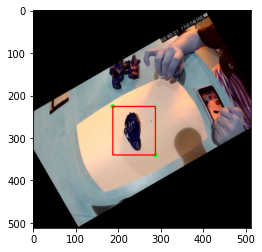

In [9]:
id = 20467

new_d = json.load(open(JSON_PATH))
img = cv2.imread(os.path.join(IMAGE_DIR, f"{id}.jpg"))

for bbox in [x["bbox"] for x in new_d["annotations"] if x["image_id"] == id]:
	plot_bbox(img, bbox)